In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [2]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.Tensor(num_data,1), std=1)
x = init.uniform_(torch.Tensor(num_data, 1), -15, 15)
y = (x**2)+3#비선형으로 한번 꼬아서
y_noise = y+ noise

model = nn.Sequential(
        nn.Linear(1,6),
        nn.ReLU(),
        nn.Linear(6,10),
        nn.ReLU(),
        nn.Linear(10,6),
        nn.ReLU(),
        nn.Linear(6,1))#4-layer fully-connected-layer

loss_fn = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.0002)

loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_fn(output,y_noise)
    loss.backward()
    optimizer.step()
    loss_array.append(loss.data)#loss값만 필요하니까 loss.data사용
    
    if (i%100)==0:
        print(f'epoch{i} loss:{loss.data}')

epoch0 loss:75.19001770019531
epoch100 loss:74.94931030273438
epoch200 loss:74.68648529052734
epoch300 loss:74.29631042480469
epoch400 loss:73.61860656738281
epoch500 loss:72.39879608154297
epoch600 loss:70.38127136230469
epoch700 loss:67.13155364990234
epoch800 loss:61.999977111816406
epoch900 loss:55.45294189453125
epoch1000 loss:48.1707878112793
epoch1100 loss:40.825828552246094
epoch1200 loss:34.367652893066406
epoch1300 loss:29.71002197265625
epoch1400 loss:26.505123138427734
epoch1500 loss:24.690418243408203
epoch1600 loss:23.6757755279541
epoch1700 loss:23.047319412231445
epoch1800 loss:22.565378189086914
epoch1900 loss:22.15570831298828
epoch2000 loss:21.78439712524414
epoch2100 loss:21.431373596191406
epoch2200 loss:21.092453002929688
epoch2300 loss:20.761619567871094
epoch2400 loss:20.436695098876953
epoch2500 loss:20.11737823486328
epoch2600 loss:19.81377410888672
epoch2700 loss:19.535978317260742
epoch2800 loss:19.263336181640625
epoch2900 loss:18.991811752319336
epoch3000 

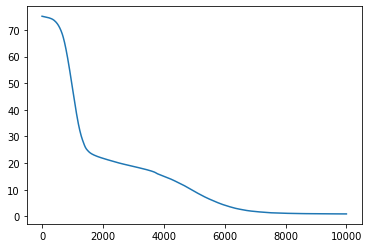

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(loss_array)
plt.show()